### 웹크롤링

In [2]:
from bs4 import BeautifulSoup as bs
import requests

In [3]:
# 웹 드라이버 라이브러리 
from selenium import webdriver

In [4]:
driver = webdriver.Chrome("C:/ChromeDriver_exe/chromedriver_102.exe")

C:\Users\admin\AppData\Local\Temp\ipykernel_13520\1652052964.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/ChromeDriver_exe/chromedriver_102.exe")


In [5]:
driver.get("https://www.naver.com")

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.115 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:u
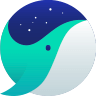
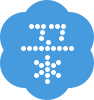

In [6]:
html = driver.page_source
html

In [7]:
html = """
<html>
<head>
<title>테스트 페이지 입니다...</title>
</head>
<body>
    <h1> 우리동네시장</h1>
    <div class = 'sale'>
        <p id='fruits1' class='fruits'>
            <span class = 'name'> 바나나 </span>
            <span class = 'price'> 3000원 </span>
            <span class = 'inventory'> 500개 </span>
            <span class = 'store'> 가나다상회 </span>
            <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
        </p>
    </div>
    <div class = 'prepare'>
        <p id='fruits2' class='fruits'>
            <span class ='name'> 파인애플 </span>
        </p>
    </div>
</body>
</html>
"""
html

"\n<html>\n<head>\n<title>테스트 페이지 입니다...</title>\n</head>\n<body>\n    <h1> 우리동네시장</h1>\n    <div class = 'sale'>\n        <p id='fruits1' class='fruits'>\n            <span class = 'name'> 바나나 </span>\n            <span class = 'price'> 3000원 </span>\n            <span class = 'inventory'> 500개 </span>\n            <span class = 'store'> 가나다상회 </span>\n            <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>\n        </p>\n    </div>\n    <div class = 'prepare'>\n        <p id='fruits2' class='fruits'>\n            <span class ='name'> 파인애플 </span>\n        </p>\n    </div>\n</body>\n</html>\n"

In [8]:
soup = bs(html, "html.parser")
soup


<html>
<head>
<title>테스트 페이지 입니다...</title>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

### HTML 정보찾기 -> 태그 이름 활용

In [9]:
# 태그 중에 span 이라는 이름을 가지는 모든 것 조회
soup.select("span")

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [10]:
soup.select("p")

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

##### HTML 접근 방법 = class(.) / id(#) / 태그(아무것도 없음) / 자식(>) / 자손(space)

In [11]:
# id 속성의 값이 fruits1이 들어있는 태그의 시작과 끝까지의 모든 태그 조회
soup.select("#fruits1")

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [12]:
soup.select(".price")

[<span class="price"> 3000원 </span>]

In [13]:
soup.select("span.name")

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [14]:
soup.select("#fruits1")

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [15]:
soup.select("#fruits1 > span.name")

[<span class="name"> 바나나 </span>]

In [16]:
# 태그명이 div 이면서 class 이름이 sale인 태그의 자식 중에 아이디 이름이 fruits1인
# 태그 밑에 있는 자식에 대한 태그명이 span이면서 클래스 이름이 name인 태그 모두 찾기
soup.select("div.sale > #fruits1 > span.name")

[<span class="name"> 바나나 </span>]

In [17]:
soup.select("div.sale span.name")[0].text

' 바나나 '

In [18]:
soup.select("div.sale span.name")[0]["class"] # class 속성의 값을 가져와라! = ["class"] : dictionary 형태이기 때문에 class(key) : name(value)

['name']

In [19]:
soup.select("a")[0]["href"] # a 태그 = 링크를 걸어주는 기능(이벤트 태그)

'http://bit.ly/forPlaywithData'

### 멜론 노래 순위 정보 크롤링

In [20]:
url = "http://www.melon.com/chart/index.htm"

In [21]:
driver.get(url)
html = driver.page_source
html

'<html lang="ko" class="narrow-screen"><head>\n\t\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\t\n\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t\n\n\t\n\n\t\n\n\t<title>멜론차트&gt;TOP100&gt;멜론</title>\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널">\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!">\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b">\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc">\n\t<meta property="fb:app_id" content="357952407588971">\n\t<meta property="og:title" content="Melon">\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png">\n\t<meta property="og:description" content="음악이 필요한 순간, 멜론">\n\t<meta property="og:url" content="http://www.melon.com/

In [22]:
soup = bs(html, "html.parser")
soup

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" pr

In [115]:
import pandas as pd

In [206]:
# 방법1
new_top100_list = []
for i in range(0, 200, 2) : 
    song = soup.select("td span > a")[i].text
    singer = soup.select("td span > a")[i+1].text
    top100_list = song, singer
    new_top100_list.append(top100_list)
    df = pd.DataFrame(new_top100_list,columns=["노래제목", "가수"])
df

,노래제목,가수
0,LOVE DIVE,IVE (아이브)
1,TOMBOY,(여자)아이들
2,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
3,사랑인가 봐,멜로망스
4,우리들의 블루스,임영웅
...,...,...
95,헤이즈 (Heize),Step Back
96,GOT the beat,Life Goes On
97,방탄소년단,그 하루(feat.반하나)
98,주호,사랑인걸


In [216]:
# 방법2
total = soup.select('tr#lst50>td>div.wrap>div.wrap_song_info>div>span>a')

df = pd.DataFrame()
all = []
for i in range(0, len(total)-3, 2):
    song = total[i].text
    artist = total[i+1].text
    song_artist = artist, song
    all.append(song_artist)
    df = pd.DataFrame(all,columns=['아티스트','제목'])
df.head(10)

,아티스트,제목
0,IVE (아이브),LOVE DIVE
1,(여자)아이들,TOMBOY
2,싸이 (PSY),That That (prod. & feat. SUGA of BTS)
3,멜로망스,사랑인가 봐
4,임영웅,우리들의 블루스
5,방탄소년단,Yet To Come
6,임영웅,사랑은 늘 도망가
7,BIG Naughty (서동현),정이라고 하자 (Feat. 10CM)
8,임영웅,다시 만날 수 있을까
9,BIGBANG (빅뱅),봄여름가을겨울 (Still Life)


In [287]:
# 방법 3(강사님)[BeautifulSoup]
# import pandas as pd
from bs4 import BeautifulSoup 
# BeautifulSoup을 이용한 방식
url = "http://www.melon.com/chart/index.htm"
driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

songs = soup.select("tr")[1:11]

list_df = []
for song in songs :
    rank = song.select("div.t_center > span.rank")[0].text
    title = song.select("div.ellipsis.rank01 > span > a")[0].text
    singer = song.select("div.ellipsis.rank02 > a")[0].text
    like = song.select("button.button_etc > span.cnt")[0].text.split("\n")[-1]



    list_df.append([rank, title, singer, like])
list_df
df = pd.DataFrame(list_df, 
                    columns=["순위", "제목", "가수", "좋아요!"])
df    

,순위,제목,가수,좋아요!
0,1,LOVE DIVE,IVE (아이브),"144,062"
1,2,TOMBOY,(여자)아이들,"188,047"
2,3,That That (prod. & feat. SUGA of BTS),싸이 (PSY),"97,431"
3,4,사랑인가 봐,멜로망스,"132,402"
4,5,우리들의 블루스,임영웅,"64,852"
5,6,Yet To Come,방탄소년단,"98,213"
6,7,사랑은 늘 도망가,임영웅,"164,714"
7,8,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),"126,554"
8,9,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),"274,102"
9,10,나의 X에게,경서,"72,832"


In [290]:
# 방법 4(강사님)[selenium] 추천!

from selenium import webdriver

url = "http://www.melon.com/chart/index.htm"
driver.get(url)

# html = driver.page_source
# soup = BeautifulSoup(html, "html.parser")

songs = driver.find_elements_by_css_selector("tr")[1:11]

list_df = []
for song in songs :
    rank = song.find_elements_by_css_selector("div.t_center > span.rank")[0].text
    title = song.find_elements_by_css_selector("div.ellipsis.rank01 > span > a")[0].text
    singer = song.find_elements_by_css_selector("div.ellipsis.rank02 > a")[0].text
    like = song.find_elements_by_css_selector("button.button_etc > span.cnt")[0].text.split("\n")[-1]



    list_df.append([rank, title, singer, like])
list_df
df = pd.DataFrame(list_df, 
                    columns=["순위", "제목", "가수", "좋아요!"])
df    

C:\Users\admin\AppData\Local\Temp\ipykernel_13520\114555707.py:11: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  songs = driver.find_elements_by_css_selector("tr")[1:11]
C:\Users\admin\AppData\Local\Temp\ipykernel_13520\114555707.py:15: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  rank = song.find_elements_by_css_selector("div.t_center > span.rank")[0].text
C:\Users\admin\AppData\Local\Temp\ipykernel_13520\114555707.py:16: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  title = song.find_elements_by_css_selector("div.ellipsis.rank01 > span > a")[0].text
C:\Users\admin\AppData\Local\Temp\ipykernel_13520\114555707.py:17: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by

,순위,제목,가수,좋아요!
0,1,LOVE DIVE,IVE (아이브),"144,062"
1,2,TOMBOY,(여자)아이들,"188,047"
2,3,That That (prod. & feat. SUGA of BTS),싸이 (PSY),"97,431"
3,4,사랑인가 봐,멜로망스,"132,402"
4,5,우리들의 블루스,임영웅,"64,852"
5,6,Yet To Come,방탄소년단,"98,215"
6,7,사랑은 늘 도망가,임영웅,"164,714"
7,8,정이라고 하자 (Feat. 10CM),BIG Naughty (서동현),"126,555"
8,9,봄여름가을겨울 (Still Life),BIGBANG (빅뱅),"274,102"
9,10,나의 X에게,경서,"72,832"
